<a href="https://colab.research.google.com/github/Utkarshmishra2k2/Advance-Statistics-in-Python/blob/main/Analysis_of_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Analysis of variance (ANOVA) is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among means.It  is based on the law of total variance, where the observed variance in a particular variable is partitioned into components attributable to different sources of variation. In its simplest form, ANOVA provides a statistical test of whether two or more population means are equal, and therefore generalizes the t-test beyond two means. In other words, the ANOVA is used to test the difference between two or more means.

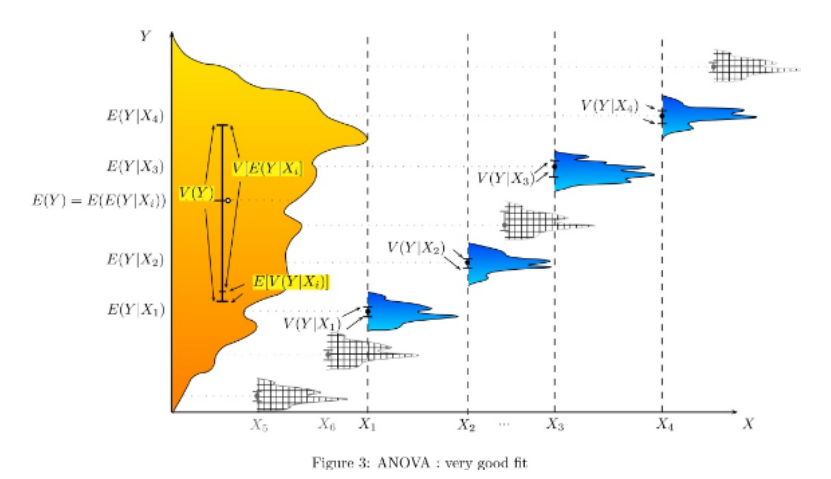

**Assumptions of Anova**

1. *Independence:* The observations within and between groups should be independent of each other. This means that the outcome of one observation should not influence the outcome of another. Independence is typically achieved through random sampling or random assignment of subjects to groups.

2. *Normality:* The data within each group should be approximately normally distributed. While one-way ANOVA is considered to be robust to moderate violations of normality, severe deviations may affect the accuracy of the test results. If normality is in doubt, non- parametric alternatives like the Shapiro-wilk test can be considered.

3. *Homogeneity of variances:* The variances of the populations from which the samples are drawn should be equal, or at least approximately so. This assumption is known as homoscedasticity. If the variances are substantially different, the accuracy of the test results may be compromised. Levene's test or Bartlett's test can be used to assess the homogeneity of variances. If this assumption is violated, alternative tests such as Welch's ANOVA can be used.

# **Objective**

To learn to use Python to run both a one-way and twoway ANOVA test

# Libraries

In [1]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Loading Data

In [3]:
data_01 = sns.load_dataset ( "diamonds" )

Here our dataset needs a
continuous variable, and up to two categorical variables.

#One-Way ANOVA


*  One-way ANOVA: Compares the means of one continuous dependent variable based on three or more groups of one categorical variable.It is an extension of the t-test, which is used for comparing the means of two independent groups. The
term "one-way" refers to the fact that there is only one independent variable (factor) with multiple levels (groups) in this analysis.






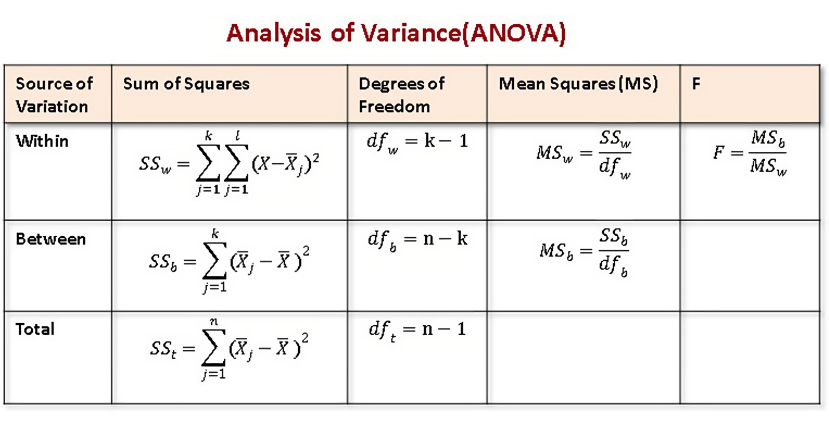

**Steps:-**

1. Define the null and alternative hypotheses.
2. Calculate the overall mean (grand mean) of all the groups combinedand mean of all the groups individually.
3. Calculate the "between-group" and "within-group" sum of squares (SS).
4. Find the between group and within group degree of freedoms.
5. Calculate the "between-group" and "within-group" mean squares (MS) by dividing their respective sum of squares by their degrees of freedom.
6. Calculate the F-statistic by dividing the "between-group" mean square by the "within group"
7. Calculate the p-value associated with the calculated F-statistic using the F-distribution and the appropriate degrees of freedom. The p-value represents the probability of obtaining an Fstatistic as extreme or more extreme than the calculated value, assuming the null hypothesis is true.
8. Choose a significance level (alpha).
9. Compare the calculated p-value with the chosen significance level (alpha).



** Decision Criteria:-**
1. If the p-value is less than or equal to alpha, reject the null hypothesis in favour of the alternative
hypothesis, concluding that there is a significant difference between at least one pair of group
means.
2. If the p-value is greater than alpha, fail to reject the null hypothesis, concluding that there is not enough evidence to suggest a significant difference between the group means.


## Data Processing

In [4]:
data_01.sample( 10 )

,carat,cut,color,clarity,depth,table,price,x,y,z
25074,1.50,Very Good,G,VS1,60.2,58.0,13596,7.38,7.41,4.45
49566,0.72,Ideal,H,SI2,61.5,56.0,2131,5.80,5.75,3.55
43171,0.54,Premium,G,SI1,61.7,59.0,1389,5.20,5.17,3.20
19061,1.61,Premium,J,VS2,61.7,59.0,7844,7.51,7.46,4.62
53388,0.76,Very Good,H,SI1,61.6,58.0,2663,5.88,5.91,3.63
16637,2.25,Fair,H,I1,67.7,58.0,6653,8.01,7.97,5.41
30362,0.36,Ideal,I,VS1,60.5,57.0,729,4.59,4.56,2.77
11607,1.12,Ideal,F,SI2,61.9,55.0,5046,6.68,6.72,4.15
46424,0.53,Ideal,E,SI1,60.9,57.0,1769,5.21,5.24,3.18
8606,1.20,Very Good,G,SI2,61.8,60.0,4443,6.78,6.85,4.21


In [5]:
data_01[ "color" ].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [6]:
colorless = data_01[ data_01 ["color" ].isin( ["E" ,"F","H","D","I"] ) ]

In [7]:
colorless = colorless[["color","price"]].reset_index(drop = True )

We took a subset of colorless and near colorless diamonds. We excluded G color grade
diamonds as there were many more of them, and we exlcluded J color grade diamonds as there
were significantly fewer of them. In a workplace setting, you would typically go through a more
thoughtful process of subsetting. The goal of this notebook is focusing on ANOVA, not data
cleaning or variable selection.

In [8]:
colorless.color = colorless.color.cat.remove_categories(["G","J"])

In [9]:
colorless["color"].values

['E', 'E', 'E', 'I', 'I', ..., 'D', 'D', 'D', 'H', 'D']
Length: 39840
Categories (5, object): ['D', 'E', 'F', 'H', 'I']

In [10]:
colorless.insert( 2 , "log_price" , [math.log(price) for price in colorless["price"]])

The first argument in the insert() function allows us to specify the location of the new
column with a column number. But the argument starts counting at 0. So if we put in 0, that is
the first column; if we enter 1, that is the second column, and so on. Since we specified 2, the new log_price column will be the third column.

Next, we use the dropna() function to drop the rows with missing values. Setting the
inplace argument to True means that we do not have to save the dataframe as a new
variable. Then, we'll reset the index using the reset_index() function to reset the index
column to account for the rows we just dropped. The inplace argument works the same as it
did for the dropna() function, and the drop argument prevents us from creating a new
column with the old index numbers preserved.

In [11]:
colorless.dropna( inplace = True )

In [12]:
colorless.reset_index( inplace = True , drop = True )

In [13]:
colorless.to_csv( "diamonds.csv",index = False ,header = list (colorless.columns))

The code creates a new .csv file of the colorless dataframe, and names it
diamonds.csv . The index argument tells the function whether or not we want to save the
index column as a column in the .csv file. Additionally, the header argument tells the function
what the names of the columns should be.

*One way Anova*

In [14]:
data_02 = pd.read_csv ( "diamonds.csv" )

In [15]:
data_02.sample( 10 )

,color,price,log_price
5529,F,4183,8.338784
30833,D,1264,7.142037
30155,H,1193,7.084226
11888,H,6250,8.740337
34206,E,1758,7.471932
16902,H,11088,9.313619
22816,D,756,6.628041
35743,D,1993,7.597396
5464,E,4165,8.334472
33546,D,1678,7.425358


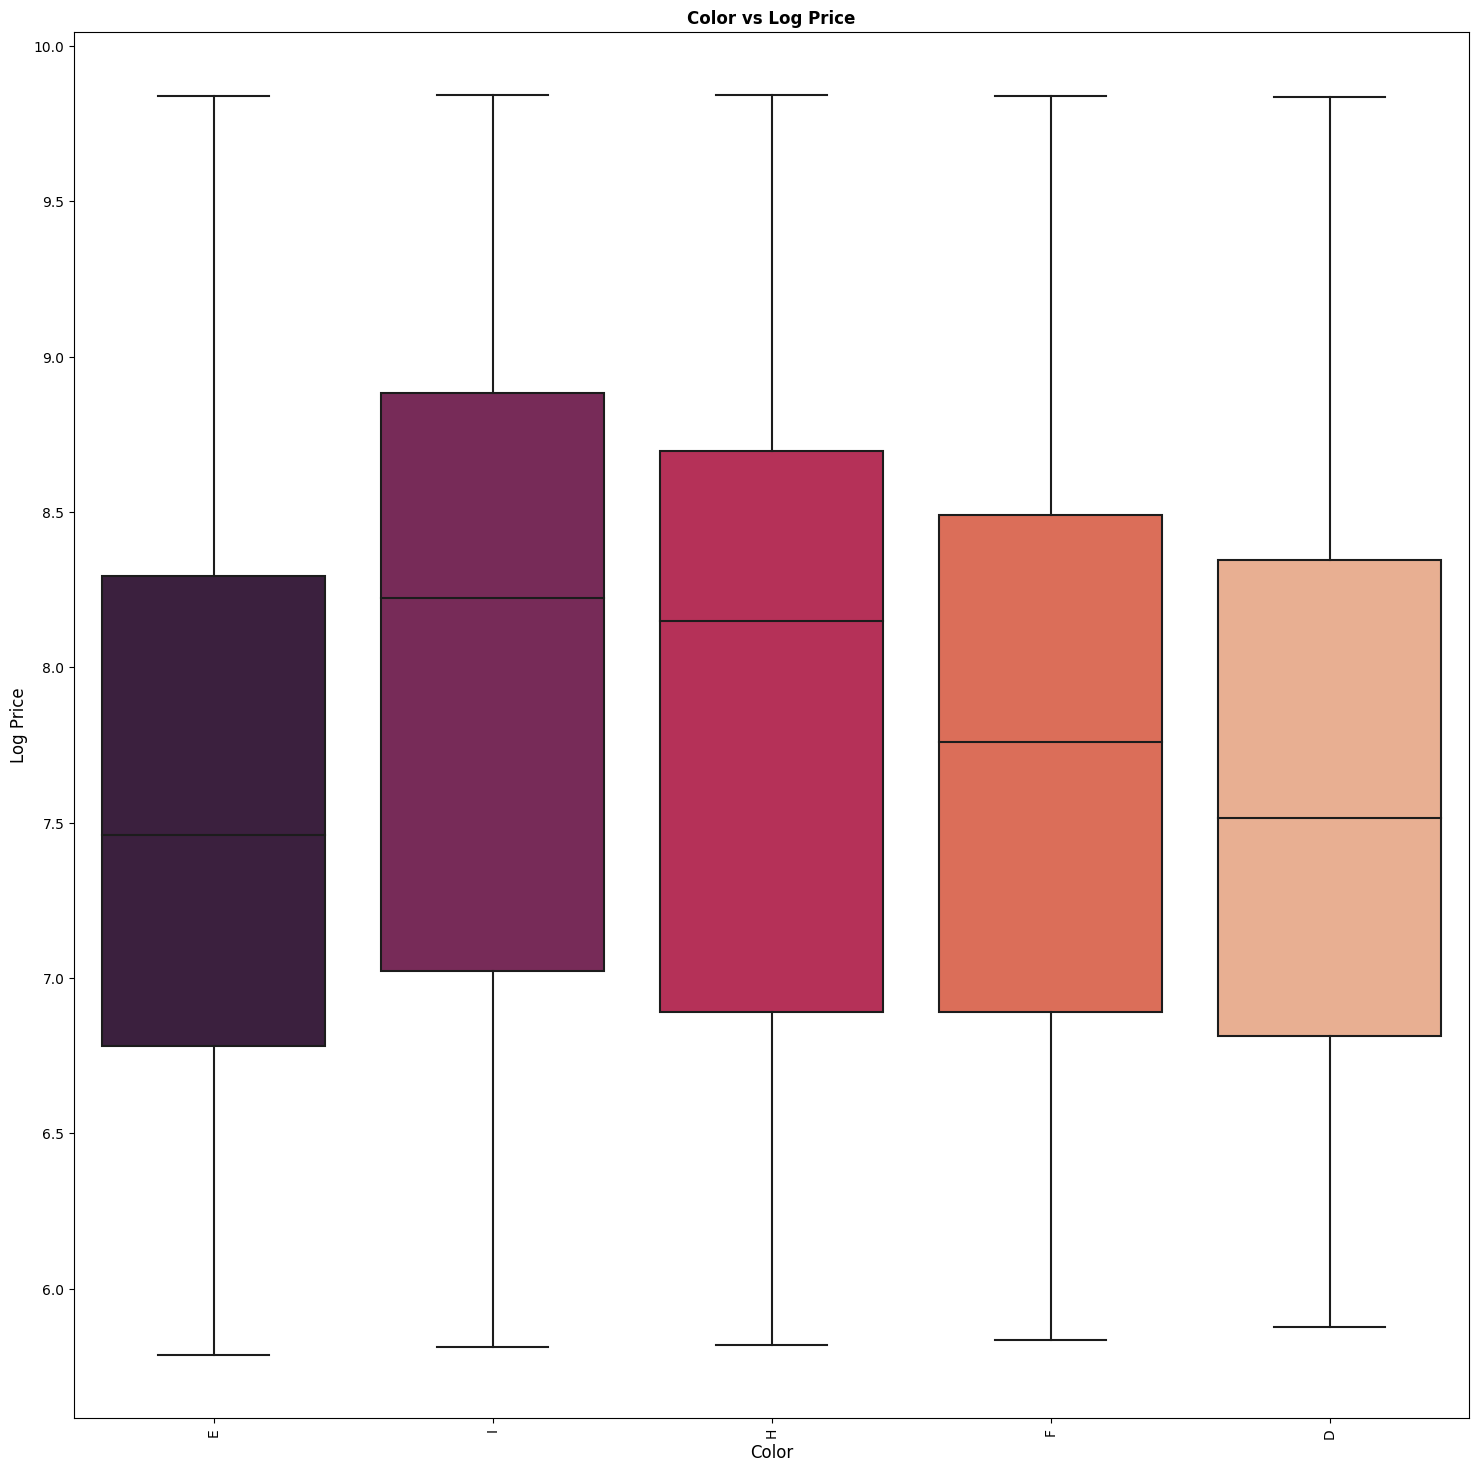

In [16]:
plt.figure(figsize = (18,18))
sns.boxplot(x = "color", y = "log_price", data = data_02, palette = 'rocket')
plt.xlabel('Color', fontsize = 12)
plt.ylabel("Log Price", fontsize = 12)
plt.xticks(rotation=90)
plt.title("Color vs Log Price", fontweight='bold')
plt.show()

##Modeling

In [17]:
model_01 =  ols ( formula = "log_price ~ C(color)" , data = data_02 ).fit()

In [18]:
model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          3.61e-225
Time:                        12:29:13   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the model summary table, the color grades' associated beta coefficients all have a p-
value of less than 0.05 (check the P>|t| column). But we can't be sure if there is a significant price difference between the various color grades. This is where one-way ANOVA comes in.

**Hypothesis:-**
 *Null Hypothesis*


𝐻0 : 𝑝𝑟𝑖𝑐𝑒𝐷 = 𝑝𝑟𝑖𝑐𝑒𝐸 = 𝑝𝑟𝑖𝑐𝑒𝐹 = 𝑝𝑟𝑖𝑐𝑒𝐻 = 𝑝𝑟𝑖𝑐𝑒I

There is no difference in the price of diamonds based on color grade.

V/s

*Alternative Hypothesis*

𝐻1 : 𝑝𝑟𝑖𝑐𝑒𝐷 != 𝑝𝑟𝑖𝑐𝑒𝐸 != 𝑝𝑟𝑖𝑐𝑒𝐹 != 𝑝𝑟𝑖𝑐𝑒𝐻 != 𝑝𝑟𝑖𝑐𝑒I (Atleast 1 not equal)

There is a difference in the price of diamonds based on color grade.

##Result

In [19]:
sm.stats.anova_lm ( model_01 ,typ = 2 )

,sum_sq,df,F,PR(>F)
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


**Conclusion **

*Since the p-value (column PR(>F) ) is very small, we can reject the null hypothesis that the mean of the price is the same for all diamond color grades.*

#Two-Way ANOVA



*   Two-way ANOVA: Compares the means of one continuous dependent variable based on three or more groups of two categorical variables.



##Data Preprocessing

In [20]:
data_03 = sns.load_dataset ( "diamonds" )

In [21]:
data_03.sample( 10 )

,carat,cut,color,clarity,depth,table,price,x,y,z
1592,0.83,Very Good,F,SI1,62.1,58.0,3010,5.98,6.06,3.74
21775,1.05,Ideal,E,VVS2,61.3,56.0,9843,6.55,6.59,4.03
52542,0.72,Very Good,I,VVS2,61.7,55.0,2532,5.76,5.81,3.57
1017,0.73,Ideal,E,VS2,61.4,55.0,2902,5.82,5.80,3.57
8644,1.06,Ideal,H,SI2,62.8,57.0,4452,6.57,6.49,4.10
30238,0.33,Ideal,E,VS2,61.6,57.0,723,4.44,4.46,2.74
41493,0.44,Premium,D,VS1,60.2,59.0,1232,4.93,4.91,2.96
2240,0.73,Good,E,VS1,63.7,59.0,3146,5.67,5.69,3.62
18554,1.02,Ideal,D,SI1,61.7,56.0,7564,6.40,6.49,3.97
18979,1.12,Ideal,F,SI1,61.7,56.0,7812,6.64,6.68,4.11


Below, we go through a very similar process as above. We start by selecting the columns of interest: color , cut , and price . Then, we subset only for certain color grades, and remove the dropped colors from the list of categories using the remove_categories() function.
Next, we subset for specific diamond cuts: Ideal , Premium , and Very Good , and remove the dropped cuts from the list of categories.

Next, we remove rows with missing data, and reset the index.
Lastly, we add in a column for the logarithm of the price.

In [22]:
data_0302 = data_03[["color" , "cut" ,"price"]]

In [23]:
data_0302 = data_0302[data_0302["color"].isin(["E","F","H","D","I"])]

In [24]:
data_0302.color = data_0302.color.cat.remove_categories(["G","J"])

In [25]:
data_0302 = data_0302[data_0302["cut"].isin(["Ideal","Premium","Very Good"])]

In [26]:
data_0302.cut = data_0302.cut.cat.remove_categories(["Good","Fair"])

In [27]:
data_0302.dropna(inplace = True)

In [28]:
data_0302.reset_index ( inplace =  True , drop = True )

In [29]:
data_0302.insert(3,"log_price", [math.log(price) for price in data_0302["price"]])

In [30]:
data_0302.sample(10)

,color,cut,price,log_price
23250,H,Premium,936,6.841615
8025,E,Ideal,5280,8.571681
31507,I,Ideal,537,6.285998
25844,E,Ideal,1114,7.015712
27942,F,Ideal,1397,7.242082
14846,F,Premium,11797,9.375601
4722,H,Very Good,4234,8.350902
14314,I,Premium,11003,9.305923
8492,E,Ideal,5476,8.608130
3139,I,Premium,3712,8.219326


In [31]:
data_0302.to_csv("data_0302.csv",index = False ,header = list(data_0302.columns))

In [32]:
data_04 = pd.read_csv("data_0302.csv")

In [33]:
data_04.sample(10)

,color,cut,price,log_price
8039,H,Very Good,5287,8.573006
17572,D,Premium,662,6.495266
8914,H,Premium,5650,8.639411
31131,I,Ideal,532,6.276643
22267,H,Premium,878,6.777647
27867,E,Very Good,1385,7.233455
13458,F,Ideal,9786,9.188708
34296,F,Ideal,2607,7.865955
804,D,Ideal,2922,7.980024
25282,F,Ideal,490,6.194405


In [34]:
model_02 = ols(formula="log_price ~ C(color) +C(cut)+C(color):C(cut)",data = data_04).fit()

In [35]:
model_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     119.5
Date:                Tue, 29 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:29:13   Log-Likelihood:                -49159.
No. Observations:               34935   AIC:                         9.835e+04
Df Residuals:                   34920   BIC:                         9.847e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             7.4567      0.019    401.583      0.000       7.420       7.493
C(color)[T.E]                        -0.0056      0.024     -0.231      0.817      -0.053       0.042
C(color)[T.F]                         0.1755      0.024      7.166      0.000       0.128       0.224
C(color)[T.H]                         0.2756      0.026     10.739      0.000       0.225       0.326
C(color)[T.I]                         0.3787      0.028     13.294      0.000       0.323       0.435
C(cut)[T.Premium]                     0.2828      0.031      9.153      0.000       0.222       0.343
C(cut)[T.Very Good]                   0.2295      0.031      7.290      0.000       0.168       0.291
C(color)[T.E]:C(cut)[T.Premium]      -0.0322      0.040     -0.800      0.424      -0.111       0.047
C(color)[T.F]:C(cut)[T.Premium]       0.0313      0.040      0.775      0.438      -0.048       0.110
C(color)[T.H]:C(cut)[T.Premium]       0.0947      0.041      2.308      0.021       0.014       0.175
C(color)[T.I]:C(cut)[T.Premium]       0.0841      0.046      1.832      0.067      -0.006       0.174
C(color)[T.E]:C(cut)[T.Very Good]    -0.0931      0.041     -2.294      0.022      -0.173      -0.014
C(color)[T.F]:C(cut)[T.Very Good]    -0.1013      0.041     -2.459      0.014      -0.182      -0.021
C(color)[T.H]:C(cut)[T.Very Good]    -0.0247      0.043     -0.576      0.564      -0.109       0.059
C(color)[T.I]:C(cut)[T.Very Good]     0.0359      0.048      0.753      0.451      -0.057       0.129
==============================================================================
Omnibus:                     4862.888   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1246.556
Skew:                           0.108   Prob(JB):                    2.06e-271
Kurtosis:                       2.100   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the model summary table, many of the color grades' and cuts' associated beta coefficients have a p-value of less than 0.05 (check the P>|t| column). Additionally, some of the interactions also seem statistically signifcant. We'll use a two-way ANOVA to examine further the relationships between price and the two categories of color grade and cut.

**Hypothesis:-**
Null Hypothesis (Color)

𝐻0 : 𝑝𝑟𝑖𝑐𝑒𝐷 = 𝑝𝑟𝑖𝑐𝑒𝐸 = 𝑝𝑟𝑖𝑐𝑒𝐹 = 𝑝𝑟𝑖𝑐𝑒𝐻 = 𝑝𝑟𝑖𝑐𝑒I

There is no difference in the price of diamonds based on color.

Alternative Hypothesis (Color)

𝐻1 : 𝑝𝑟𝑖𝑐𝑒𝐷 != 𝑝𝑟𝑖𝑐𝑒𝐸 != 𝑝𝑟𝑖𝑐𝑒𝐹 != 𝑝𝑟𝑖𝑐𝑒𝐻 != 𝑝𝑟𝑖𝑐𝑒I (Atleast 1 not equal)

There is a difference in the price of diamonds based on color.

**Hypothesis:-**

*Null Hypothesis (Color):*

𝐻0 : 𝑝𝑟𝑖𝑐𝑒𝐷 = 𝑝𝑟𝑖𝑐𝑒𝐸 = 𝑝𝑟𝑖𝑐𝑒𝐹 = 𝑝𝑟𝑖𝑐𝑒𝐻 = 𝑝𝑟𝑖𝑐𝑒I

There is no difference in the price of diamonds based on color.

*Alternative Hypothesis (Color):*

𝐻1 : 𝑝𝑟𝑖𝑐𝑒𝐷 != 𝑝𝑟𝑖𝑐𝑒𝐸 != 𝑝𝑟𝑖𝑐𝑒𝐹 != 𝑝𝑟𝑖𝑐𝑒𝐻 != 𝑝𝑟𝑖𝑐𝑒I (Atleast 1 not equal)

There is a difference in the price of diamonds based on color.



*Null Hypothesis (Cut):*

H0 : priceIdeal = pricePremium = priceVery Good

There is no difference in the price of diamonds based on cut.


*Alternative Hypothesis (Cut):*

H1 :  priceIdeal != pricePremium != priceVery Good(Atleast 1 not equal)

There is a difference in the price of diamonds based on cut.



*Null Hypothesis (Interaction):*
H0: The effect of color on diamond price is independent of the cut, and vice versa.

*Alternative Hypothesis (Interaction):*

H1:There is an interaction effect between color and cut on diamond price

In [36]:
sm.stats.anova_lm(model_02,typ=2)

,sum_sq,df,F,PR(>F)
C(color),926.361461,4.0,237.014783,3.481145e-201
C(cut),630.641441,2.0,322.706309,1.348511e-139
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


Since all of the p-values (column PR(>F) ) are very small, we can reject all three null hypotheses.

# Post-hoc Test

# Introduction:

In order to find out exactly which groups are different from each other, we must conduct a post hoc test (also known as a multiple comparison test), which will allow us to explore the difference between multiple group means while also controlling for the family-wise error rate.

# **Objective**

To learn to use Python to Using Post Hoc Tests with ANOVA.

# Libraries

In [37]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Loading Data

In [39]:
data_01 = sns.load_dataset ( "diamonds" )

Here our dataset needs a
continuous variable, and up to two categorical variables.

#One-Way ANOVA


*  One-way ANOVA: Compares the means of one continuous dependent variable based on three or more groups of one categorical variable.





In [40]:
data_01.insert(3,"log_price", [math.log(price) for price in data_01["price"]])

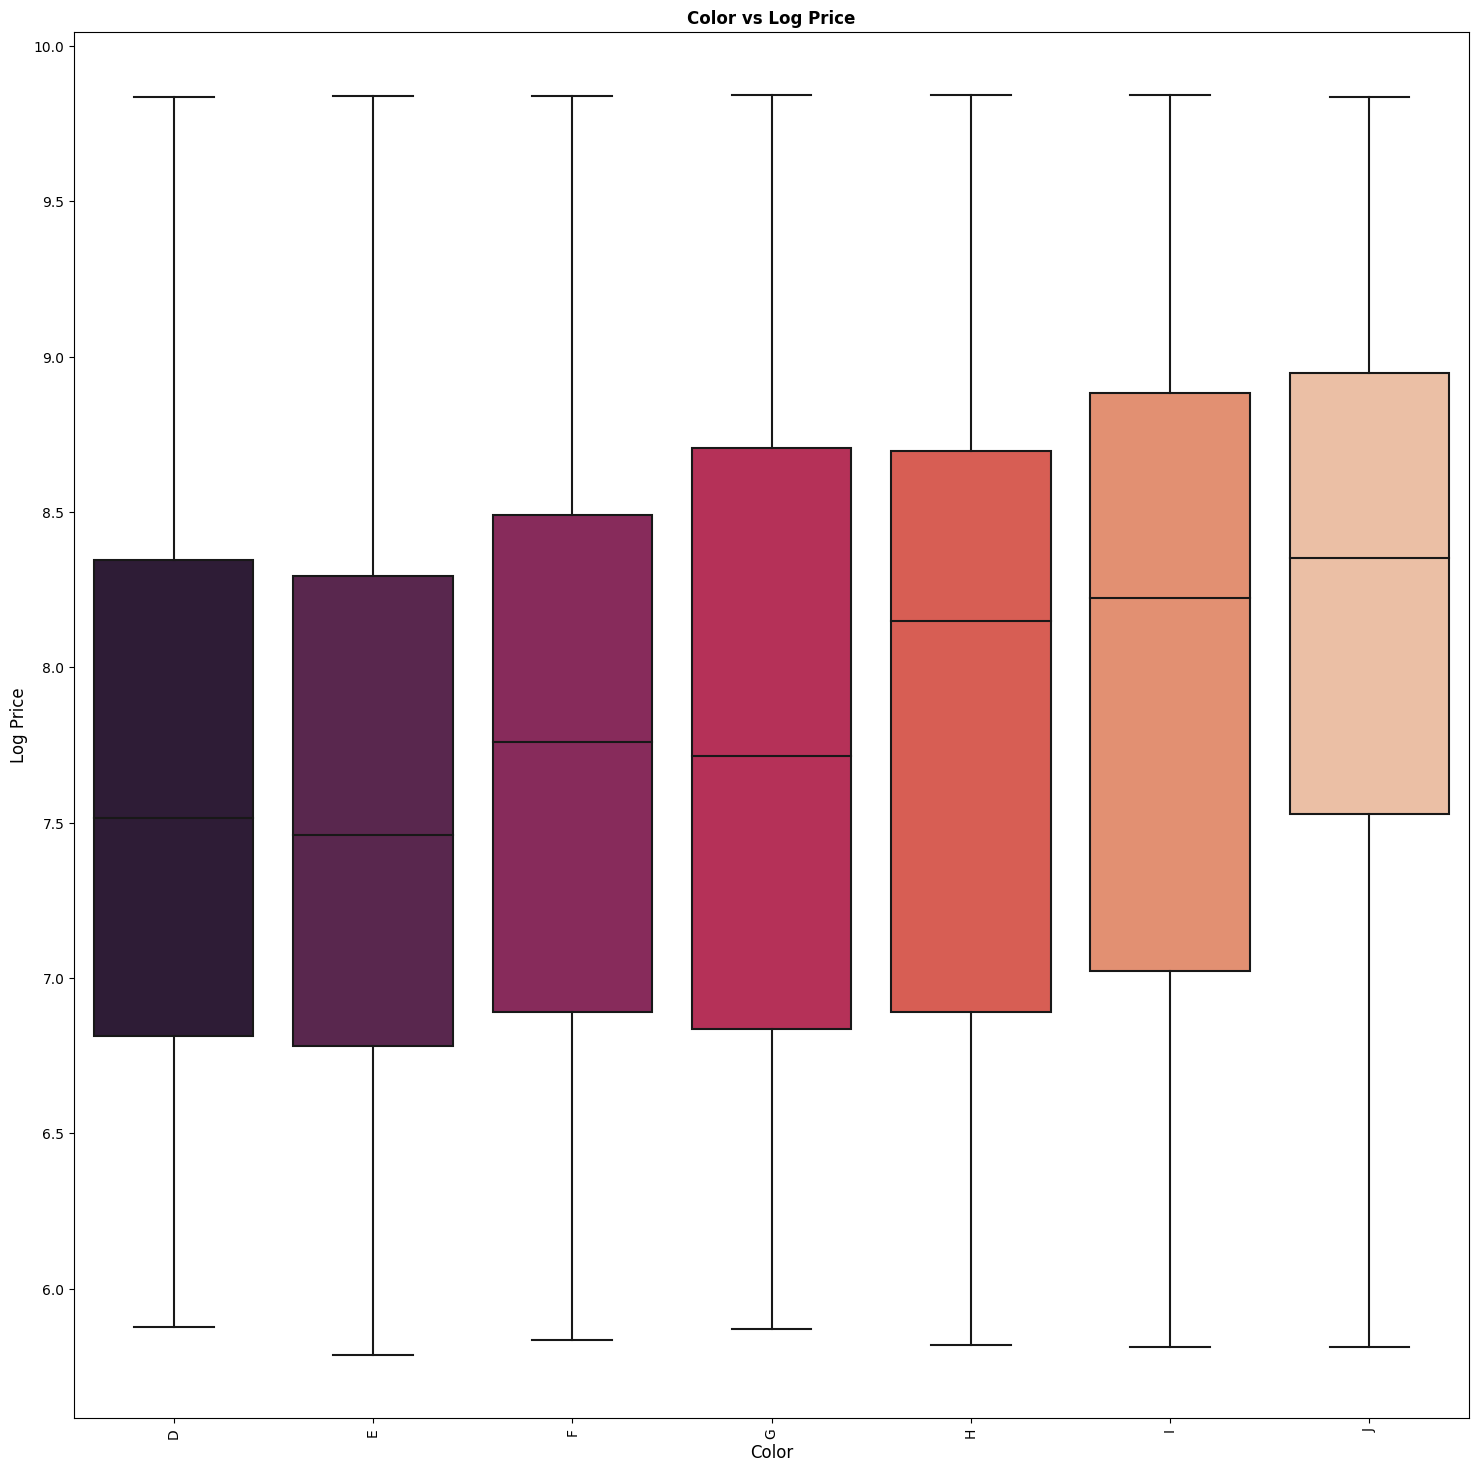

In [41]:
plt.figure(figsize = (18,18))
sns.boxplot(x = "color", y = "log_price", data = data_01, palette = 'rocket')
plt.xlabel('Color', fontsize = 12)
plt.ylabel("Log Price", fontsize = 12)
plt.xticks(rotation=90)
plt.title("Color vs Log Price", fontweight='bold')
plt.show()

In [42]:
model_01 =  ols ( formula = "log_price ~ C(color)" , data = data_01 ).fit()

In [43]:
model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     237.8
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          3.77e-301
Time:                        12:29:14   Log-Likelihood:                -76617.
No. Observations:               53940   AIC:                         1.532e+05
Df Residuals:                   53933   BIC:                         1.533e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    625.984      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.370      0.018      -0.069      -0.006
C(color)[T.F]     0.1455      0.016      9.146      0.000       0.114       0.177
C(color)[T.G]     0.1727      0.015     11.219      0.000       0.143       0.203
C(color)[T.H]     0.3015      0.016     18.390      0.000       0.269       0.334
C(color)[T.I]     0.4061      0.018     22.250      0.000       0.370       0.442
C(color)[T.J]     0.5291      0.022     23.537      0.000       0.485       0.573
==============================================================================
Omnibus:                    11794.122   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2240.596
Skew:                           0.064   Prob(JB):                         0.00
Kurtosis:                       2.010   Cond. No.                         8.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
sm.stats.anova_lm ( model_01 ,typ = 2 )

,sum_sq,df,F,PR(>F)
C(color),1431.255783,6.0,237.807767,3.767555e-301
Residual,54099.661516,53933.0,NaN,NaN


Since the p-value is very small and we can reject the null hypothesis that the mean price is the same for all diamond color grades

The post hoc test
is useful because the one-way ANOVA does not tell us which colors are associated with different prices. The post hoc test will give us more information.

In [ ]:
onway = pairwise_tukeyhsd(endog=data_01["log_price"],groups=data_01["log_price"],alpha = 0.05)

In [ ]:
onway.summary( )

Each row represents a pariwise comparison between the prices of two diamond color grades.
The reject column tells us which null hypotheses we can reject. Based on the values in that column, we can reject each null hypothesis, except when comparing D and E color diamonds.We cannot reject the null hypothesis that the diamond price of D and E color diamonds are the same.

**Test 1: D vs. E**

𝐻0: 𝑝𝑟𝑖𝑐𝑒𝐷 =  𝑝𝑟𝑖𝑐𝑒E   
i.e The price of D and E color grade diamonds are the same.

V/s

𝐻0: 𝑝𝑟𝑖𝑐𝑒𝐷 ≠ 𝑝𝑟𝑖𝑐𝑒�
i.e The price of D and E color grade diamonds are not the same

*Conclusion:* We cannot reject the null hypothesis that the price of D and E color grade diamonds are
the same


**Test 2: D vs. F**

𝐻0: 𝑝𝑟𝑖𝑐𝑒𝐷 = 𝑝𝑟𝑖𝑐𝑒F
i.e The price of D and F color grade diamonds are the same.

𝐻0: 𝑝𝑟𝑖𝑐𝑒𝐷 ≠ 𝑝𝑟𝑖𝑐𝑒F
i.e The price of D and F color grade diamonds are not the same.

*Conclusion:*We can reject the null hypothesis that the price of D and F color grade diamonds are the same.


**Test 3: D vs. H**

𝐻0: 𝑝𝑟𝑖𝑐𝑒𝐷 = 𝑝𝑟𝑖𝑐𝑒H
i.e The price of D and H color grade diamonds are the same.

𝐻0: 𝑝𝑟𝑖𝑐𝑒𝐷 ≠ 𝑝𝑟𝑖𝑐𝑒H
i.e The price of D and H color grade diamonds are not the same.

*Conclusion:*We can reject the null hypothesis that the price of D and H color grade diamonds are the same


**Test 4: D vs. I**

𝐻0: 𝑝𝑟𝑖𝑐𝑒𝐷 = 𝑝𝑟𝑖𝑐𝑒I
i.e The price of D and I color grade diamonds are the same.

𝐻0: 𝑝𝑟𝑖𝑐𝑒𝐷 ≠ 𝑝𝑟𝑖𝑐𝑒I
i.e The price of D and I color grade diamonds are not the same.

*Conclusion:*We can reject the null hypothesis that the price of D and I color grade diamonds are the same.


**Test 5: E vs. F**

𝐻0: 𝑝𝑟𝑖𝑐𝑒𝐸 = 𝑝𝑟𝑖𝑐𝑒F
i.e The price of E and F color grade diamonds are the same.

𝐻0: 𝑝𝑟𝑖𝑐𝑒𝐸 ≠ 𝑝𝑟𝑖𝑐𝑒F
i.e The price of E and F color grade diamonds are not the same.

*Conclusion:*We can reject the null hypothesis that the price of E and F color grade diamonds are the same.


**Test 6: E vs. H**

𝐻0: 𝑝𝑟𝑖𝑐𝑒𝐸 = 𝑝𝑟𝑖𝑐𝑒H
i.e The price of E and H color grade diamonds are the same.

𝐻0: 𝑝𝑟𝑖𝑐𝑒𝐸 ≠ 𝑝𝑟𝑖𝑐𝑒H
i.e The price of E and H color grade diamonds are not the same.

*Conclusion:*We can reject the null hypothesis that the price of E and H color grade diamonds are the same.


**Test 7: E vs. I**

𝐻0: 𝑝𝑟𝑖𝑐𝑒𝐸 = 𝑝𝑟𝑖𝑐𝑒I
i.e The price of E and I color grade diamonds are the same.

𝐻0: 𝑝𝑟𝑖𝑐𝑒𝐸 ≠ 𝑝𝑟𝑖𝑐𝑒I
i.e The price of E and I color grade diamonds are not the same.

*Conclusion:*We can reject the null hypothesis that the price of E and I color grade diamonds are the same.


**Test 8: F vs. H**

𝐻0: 𝑝𝑟𝑖𝑐𝑒𝐹 = 𝑝𝑟𝑖𝑐𝑒H
i.e The price of F and H color grade diamonds are the same.

𝐻0: 𝑝𝑟𝑖𝑐𝑒𝐹 ≠ 𝑝𝑟𝑖𝑐𝑒H
i.e The price of F and H color grade diamonds are not the same.

*Conclusion:*We can reject the null hypothesis that the price of F and H color grade diamonds are the
same.

**Test 9: F vs. I**

𝐻0: 𝑝𝑟𝑖𝑐𝑒𝐹 = 𝑝𝑟𝑖𝑐𝑒I
i.e The price of F and I color grade diamonds are the same.

𝐻0: 𝑝𝑟𝑖𝑐𝑒𝐹 ≠ 𝑝𝑟𝑖𝑐𝑒I
i.e The price of F and I color grade diamonds are not the same.

*Conclusion:*We can reject the null hypothesis that the price of F and I color grade diamonds are the same.



**Test 10: H vs. I**

𝐻0: 𝑝𝑟𝑖𝑐𝑒H = 𝑝𝑟𝑖𝑐𝑒I
i.e The price of H and I color grade diamonds are the same.

𝐻0: 𝑝𝑟𝑖𝑐𝑒H ≠ 𝑝𝑟𝑖𝑐𝑒I
i.e The price of H and I color grade diamonds are not the same.

*Conclusion:*We can reject the null hypothesis that the price of H and I color grade diamonds are the same.

**Applications in Machine Learning:-**

1. *Hyperparameter tuning:* When selecting the best hyperparameters for a machine learning model, one-way ANOVA can be used to compare the performance of models with different  hyperparameter settings. By treating each hyperparameter setting as a group, you can perform one-way ANOVA to determine if there are any significant differences in performance across the various settings.

2. *Feature selection:* One-way ANOVA can be used as a univariate feature selection method to identify features that are significantly associated with the target variable, especially when the target variable is categorical with more than two levels. In this context, the one-way ANOVA is performed for each feature, and features with low p-values are considered to be more relevant for prediction.

3. *Algorithm comparison:* When comparing the performance of different machine learning algorithms, one-way ANOVA can be used to determine if there are any significant differences in their performance metrics (e.g., accuracy, F1 score, etc.) across multiple runs or crossvalidation folds. This can help you decide which algorithm is the most suitable for a specific problem.

4. *Model stability assessment:* One-way ANOVA can be used to assess the stability of a machine learning model by comparing its performance across different random seeds or initializations. If the model's performance varies significantly between different initializations, it may indicate that the model is unstable or highly sensitive to the choice of initial conditions.


In [3]:
print( "The End" )

The End
